In [1]:
%pip install pyarrow


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install --upgrade pandas pyarrow

  Using cached pandas-2.3.3-cp313-cp313-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
Using cached pandas-2.3.3-cp313-cp313-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.3.1
    Not uninstalling pandas at /layers/paketo-buildpacks_poetry-install/poetry-venv/datascience-python-renku-dependencies-xS3fZVNL-py3.13/lib/python3.13/site-packages, outside environment /home/renku/work/.venv
    Can't uninstall 'pandas'. No files were found to uninstall.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
%pip install "flaml[automl]"
%pip install "catboost"


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 58.4 MB/s  0:00:016m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [catboost]1/2 [catboost]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

from flaml import AutoML

In [4]:
path_train_data = "../aventa-av-7-6kw-iet-ost-resear-doi-10.5281-zenodo.16276333/train.parquet"

In [5]:
train_data = pd.read_parquet(path_train_data)

In [6]:
train_data["datetime"] = pd.to_datetime(train_data["datetime"])
train_data = train_data.set_index("datetime")

In [7]:
train_data_10m = train_data.resample("10min").mean()

<Axes: xlabel='datetime'>

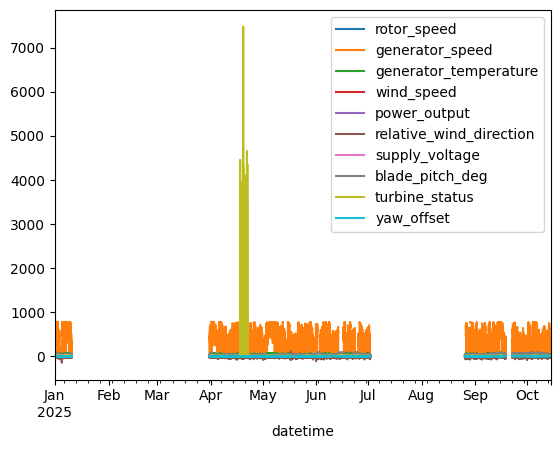

In [8]:
train_data_10m.plot()

<Axes: xlabel='datetime'>

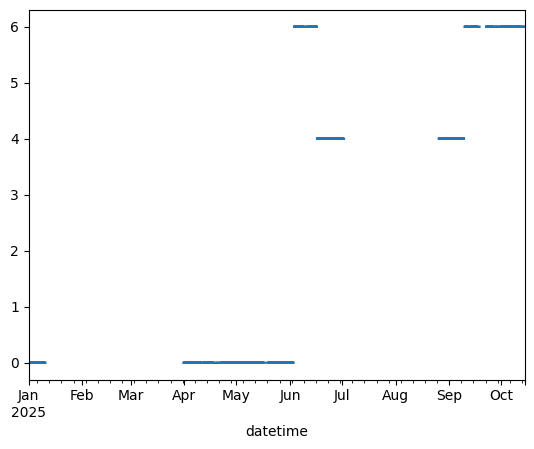

In [13]:
train_data_10m["yaw_offset"].plot()

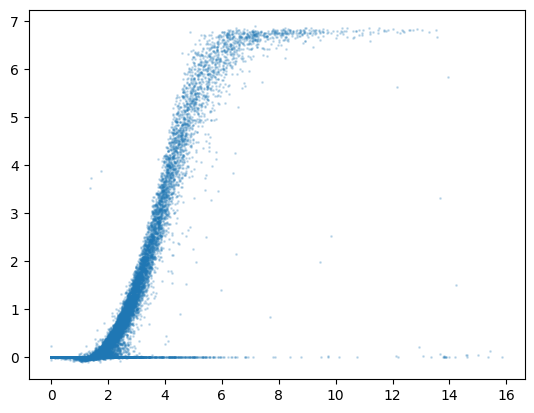

In [9]:
plt.scatter(train_data_10m["wind_speed"],train_data_10m["power_output"],s=1,alpha=0.2,c=train_data_10m["yaw_offset"])

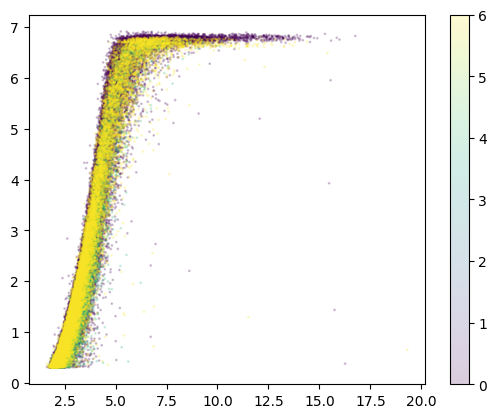

In [16]:
train_data_1m = train_data.resample("1min").mean()
train_data_1m = train_data_1m[train_data_1m["power_output"]<10]
train_data_1m = train_data_1m[train_data_1m["power_output"]>0.3]
train_data_1m = train_data_1m[train_data_1m["wind_speed"]>1]
plt.scatter(train_data_1m["wind_speed"],train_data_1m["power_output"],s=1,alpha=0.2,c=train_data_1m["yaw_offset"])
plt.colorbar()

In [19]:
# Use FLAML for automated model and hyperparameter optimization
automl = AutoML()

In [40]:
# Define AutoML settings
automl_settings = {
    "time_budget": 60*1,             # Seconds to spend
    "ensemble": True,                # Use ensemble of best
    "task": "classification",           # Type of task
    "metric": "log_loss",               # Evaluation metric
    #"estimator_list": ["catboost", "xgboost", "xgb_limitdepth", "lgbm", "rf", "extra_tree"],
    "estimator_list": ["catboost", "lgbm","rf"],
    "log_file_name": "automl.log",  # Save logs
    "seed": 42,
}

In [22]:
train_data_1m

,rotor_speed,generator_speed,generator_temperature,wind_speed,power_output,relative_wind_direction,supply_voltage,blade_pitch_deg,turbine_status,yaw_offset
datetime,,,,,,,,,,
2025-01-01 06:22:00+00:00,39.200000,488.000000,12.800000,3.100000,1.200000,-12.000000,27.8,14.034,10.0,0.0
2025-01-01 06:23:00+00:00,36.060000,449.516667,12.853333,2.676667,0.891833,-13.766667,27.8,14.034,10.0,0.0
2025-01-01 06:24:00+00:00,38.118333,471.750000,12.971667,2.875000,1.126333,-14.050000,27.8,14.034,10.0,0.0
2025-01-01 06:25:00+00:00,37.298333,462.800000,13.118333,2.686667,1.015333,-16.533333,27.8,14.034,10.0,0.0
2025-01-01 06:26:00+00:00,35.975000,449.116667,13.220000,2.746667,0.887167,-18.750000,27.8,14.034,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2025-10-14 12:53:00+00:00,36.373333,453.550000,30.935000,2.616667,0.908833,12.816667,27.8,14.034,10.0,6.0
2025-10-14 12:54:00+00:00,36.298333,448.183333,31.066667,2.683333,0.931000,9.800000,27.8,14.034,10.0,6.0
2025-10-14 12:55:00+00:00,41.905000,518.100000,31.158333,2.955000,1.553333,-2.600000,27.8,14.034,10.0,6.0


In [28]:
X_columns = train_data_1m.columns[:-1]
X_train = train_data_1m[X_columns]

y_columns = train_data_1m.columns[-1]
y_train = train_data_1m[y_columns]

In [ ]:
# Fit AutoML
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

[flaml.automl.logger: 12-07 23:41:26] {1752} INFO - task = classification
[flaml.automl.logger: 12-07 23:41:26] {1763} INFO - Evaluation method: holdout
[flaml.automl.logger: 12-07 23:41:26] {1862} INFO - Minimizing error metric: log_loss
[flaml.automl.logger: 12-07 23:41:26] {1979} INFO - List of ML learners in AutoML Run: ['catboost', 'lgbm', 'rf']
[flaml.automl.logger: 12-07 23:41:26] {2282} INFO - iteration 0, current learner catboost
[flaml.automl.logger: 12-07 23:41:27] {2417} INFO - Estimated sufficient time budget=57549s. Estimated necessary time budget=58s.
[flaml.automl.logger: 12-07 23:41:27] {2466} INFO -  at 1.1s,	estimator catboost's best error=0.8820,	best estimator catboost's best error=0.8820
[flaml.automl.logger: 12-07 23:41:27] {2282} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 12-07 23:41:28] {2466} INFO -  at 1.8s,	estimator lgbm's best error=0.9392,	best estimator catboost's best error=0.8820
[flaml.automl.logger: 12-07 23:41:28] {2282} INFO - i

In [ ]:
y_test_pred = automl.predict(X_train)

In [ ]:
plt.plot(y_train)

In [ ]:
plt.plot(y_test_pred)